In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-police-shootings/shootings.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/us-police-shootings/shootings.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [4]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

In [5]:
# Dataset shape and missing values
df.shape, df.isnull().sum()

((4895, 15),
 id                         0
 name                       0
 date                       0
 manner_of_death            0
 armed                      0
 age                        0
 gender                     0
 race                       0
 city                       0
 state                      0
 signs_of_mental_illness    0
 threat_level               0
 flee                       0
 body_camera                0
 arms_category              0
 dtype: int64)

In [6]:
# Drop 'id', 'name', 'date' (not useful for prediction)
df.drop(['id', 'name', 'date'], axis=1, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

In [7]:
# Confirm cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   manner_of_death          4895 non-null   object 
 1   armed                    4895 non-null   object 
 2   age                      4895 non-null   float64
 3   gender                   4895 non-null   object 
 4   race                     4895 non-null   object 
 5   city                     4895 non-null   object 
 6   state                    4895 non-null   object 
 7   signs_of_mental_illness  4895 non-null   bool   
 8   threat_level             4895 non-null   object 
 9   flee                     4895 non-null   object 
 10  body_camera              4895 non-null   bool   
 11  arms_category            4895 non-null   object 
dtypes: bool(2), float64(1), object(9)
memory usage: 392.1+ KB


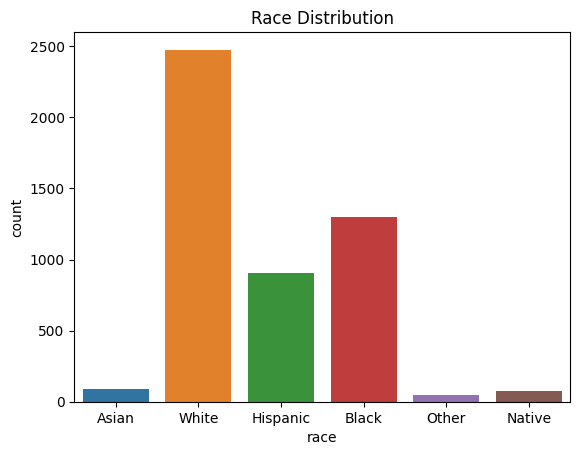

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Race distribution
sns.countplot(data=df, x='race')
plt.title("Race Distribution")
plt.show()

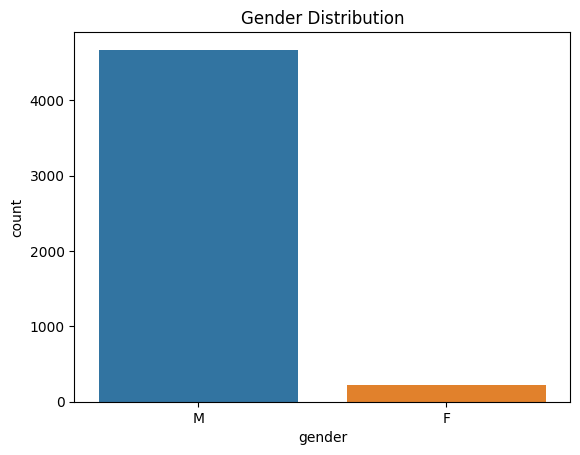

In [9]:
# Gender distribution
sns.countplot(data=df, x='gender')
plt.title("Gender Distribution")
plt.show()

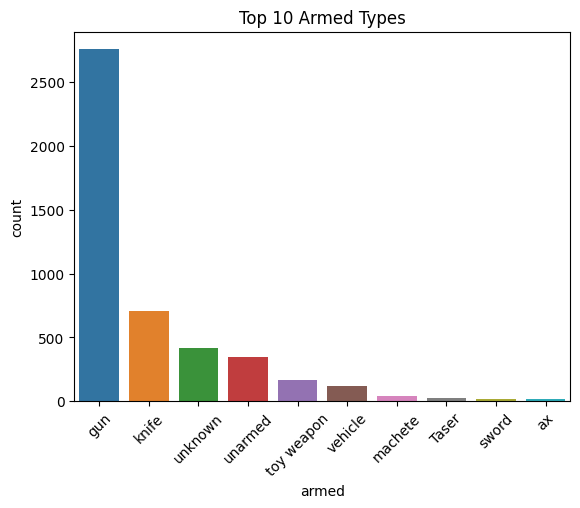

In [10]:
# Armed vs Unarmed
sns.countplot(data=df, x='armed', order=df['armed'].value_counts().iloc[:10].index)
plt.title("Top 10 Armed Types")
plt.xticks(rotation=45)
plt.show()

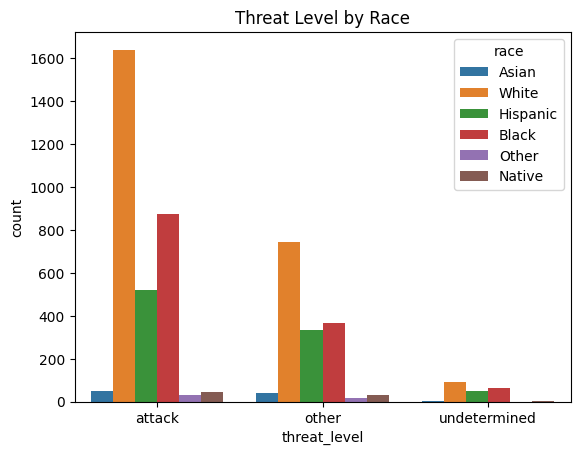

In [11]:
# Threat Level by Race
sns.countplot(data=df, x='threat_level', hue='race')
plt.title("Threat Level by Race")
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Copy the dataset
data = df.copy()

# Encode categorical columns
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = LabelEncoder().fit_transform(data[col])

In [13]:
# Features and Target
X = data.drop('threat_level', axis=1)
y = data['threat_level']

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7129724208375894
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       650
           1       0.56      0.48      0.52       290
           2       0.29      0.13      0.18        39

    accuracy                           0.71       979
   macro avg       0.54      0.49      0.50       979
weighted avg       0.69      0.71      0.70       979

